### PySDR

Brent A. Thorne brentathorne@gmail.com


In [2]:
import numpy as np
t = np.arange(100)
s = np.sin(0.15*2*np.pi*t)

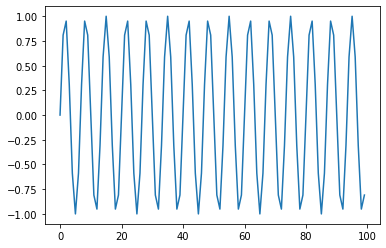

In [3]:
import matplotlib.pyplot as plt
plt.plot(t,s)

In [4]:
S = np.fft.fft(s)

array([ 5.38968388e-15+0.00000000e+00j, -1.55941444e-15-2.22044605e-15j,
        1.45864015e-14+2.78762434e-15j, -1.78241818e-14+3.88578059e-15j,
        6.83917301e-15-2.11070206e-17j, -5.36670238e-16+0.00000000e+00j,
        5.71927957e-15-2.20211122e-15j,  1.75351994e-14+8.54585802e-15j,
       -1.04213601e-14+1.19105191e-14j, -2.66989200e-14-1.84122952e-14j,
        5.99794329e-15+3.46035242e-15j,  2.90670110e-14-1.62975202e-14j,
        9.99886497e-15+1.42128161e-14j,  2.77047973e-15+1.26706965e-14j,
        1.37297060e-14+2.66857037e-14j, -8.44092504e-14-5.00000000e+01j,
       -5.15143689e-15-2.36243013e-14j,  1.47063314e-15-2.72457207e-14j,
        1.10303868e-14-1.56776819e-14j,  1.38233919e-14-1.64246700e-15j,
        9.73411865e-15-5.19843387e-15j,  3.63128054e-15+9.21734639e-16j,
        2.67907076e-14+1.61347636e-14j, -1.99466829e-14+1.65968830e-14j,
       -7.34552066e-15-4.46477170e-16j, -8.63965975e-15-1.06581410e-14j,
        1.48780513e-14-2.04288559e-15j, -9.63667647

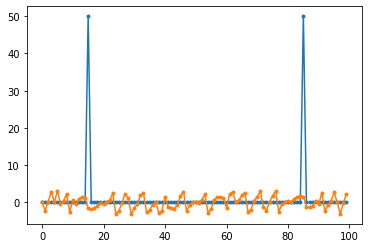

In [5]:
import matplotlib.pyplot as plt
S_mag = np.abs(S)
S_phase = np.angle(S)
plt.plot(t,S_mag,'.-')
plt.plot(t,S_phase,'.-')

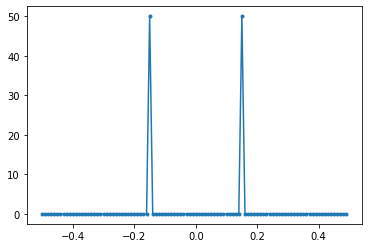

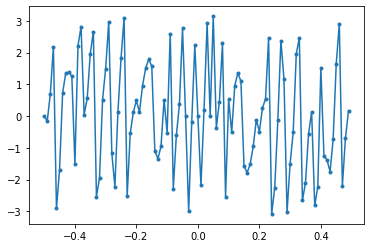

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1 # Hz
N = 100 # number of points to simulate, and our FFT size

t = np.arange(N) # because our sample rate is 1 Hz
s = np.sin(0.15*2*np.pi*t)
S = np.fft.fftshift(np.fft.fft(s))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
plt.figure(0)
plt.plot(f, S_mag,'.-')
plt.figure(1)
plt.plot(f, S_phase,'.-')
plt.show()

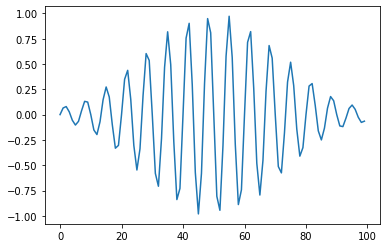

In [7]:
s = s * np.hamming(100)
plt.plot(t,s)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 1e6

# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t))

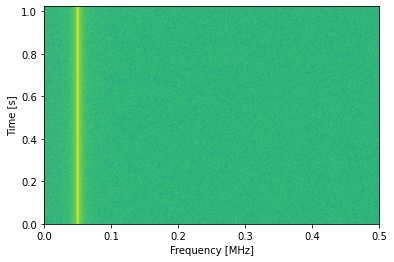

In [5]:
# simulate the signal above

fft_size = 1024
num_rows = int(np.floor(len(x)/fft_size))
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)
spectrogram = spectrogram[:,fft_size//2:] # get rid of negative freqs because we simulated a real signal

plt.imshow(spectrogram, aspect='auto', extent = [0, sample_rate/2/1e6, 0, len(x)/sample_rate])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()

In [1]:
import sys
from PyQt5.QtCore import Qt
from PyQt5.QtGui import QFont, QColor
from PyQt5.QtWidgets import QApplication, QHBoxLayout, QLabel, QSizePolicy, QSlider, QSpacerItem, QVBoxLayout, QWidget, QGridLayout
import pyqtgraph as pg # sudo pip3 install pyqtgraph
import numpy as np

class Slider(QWidget):
    def __init__(self, minimum, maximum, prefix):
        super(Slider, self).__init__()
        self.verticalLayout = QVBoxLayout(self)
        self.label = QLabel(self)
        self.label.setAlignment(Qt.AlignHCenter)
        self.verticalLayout.addWidget(self.label)
        self.slider = QSlider(self)
        self.slider.setOrientation(Qt.Horizontal)
        self.verticalLayout.addWidget(self.slider)
        self.minimum = minimum
        self.maximum = maximum
        self.prefix = prefix
        self.slider.valueChanged.connect(self.setLabelValue)
        self.setLabelValue(self.slider.value())
        
    def setLabelValue(self, value):
        self.x = self.minimum + (float(value) / (self.slider.maximum() - self.slider.minimum())) * (self.maximum - self.minimum)
        self.label.setText(self.prefix + "{0:.2g}".format(self.x))

class Widget(QWidget):
    def __init__(self):
        super(Widget, self).__init__()
        self.setFixedWidth(800) 
        self.setFixedHeight(550) 
        self.setStyleSheet("background-color: white;")
        self.Layout = QGridLayout(self)
        self.w1 = Slider(-2, 2, 'I = ')
        self.Layout.addWidget(self.w1, 0, 0)
        self.w2 = Slider(-2, 2, 'Q = ')
        self.Layout.addWidget(self.w2, 1, 0)
        self.win = pg.GraphicsLayoutWidget()
        self.win.setBackground('w')
        self.Layout.addWidget(self.win, 2, 0)
        self.plot = self.win.addPlot()
        legend = self.plot.addLegend(offset=5) # move legend, still not quite sure how this one works
        self.curve_I = self.plot.plot(pen=pg.mkPen('r', width=5), name="I*cos()")
        self.curve_Q = self.plot.plot(pen=pg.mkPen('b', width=5), name="Q*sin()")
        self.curve_sum = self.plot.plot(pen=pg.mkPen('#00991c', width=5, style=Qt.DotLine), name="I*cos() + Q*sin()")
        self.update_plot()
        self.plot.setXRange(0, 150)
        self.plot.setYRange(-3, 3)
        self.w1.slider.valueChanged.connect(self.update_plot)
        self.w2.slider.valueChanged.connect(self.update_plot)
        
        # Make lines/ticks black
        font=QFont()
        font.setPixelSize(20)
        self.plot.getAxis("bottom").setPen(pg.mkPen('k'))
        self.plot.getAxis("bottom").setTextPen(pg.mkPen('k'))
        self.plot.getAxis("left").setPen(pg.mkPen('k'))
        self.plot.getAxis("left").setTextPen(pg.mkPen('k'))
        
        # CHANGE THE FONT SIZE AND COLOR OF ALL LEGENDS LABEL
        legendLabelStyle = {'color': '#000', 'size': '14pt', 'bold': False, 'italic': False}
        for item in legend.items:
            for single_item in item:
                if isinstance(single_item, pg.graphicsItems.LabelItem.LabelItem):
                    single_item.setText(single_item.text, **legendLabelStyle)
        
        # SET AND CHANGETHE FONT SIZE AND COLOR OF THE PLOT AXIS LABEL
        labelStyle = {'color': '#000', 'font-size': '18px'}
        self.plot.setLabel('bottom', 'Time', **labelStyle)
        self.plot.setLabel('left', 'Amplitude', **labelStyle)



    def update_plot(self):
        x = np.linspace(0, 10, 150)
        self.curve_I.setData(self.w1.x*np.cos(x))
        self.curve_Q.setData(self.w2.x*np.sin(x))
        self.curve_sum.setData(self.w1.x*np.cos(x) + self.w2.x*np.sin(x))

if __name__ == '__main__':
    app = QApplication(sys.argv)
    w = Widget()
    w.show()
    sys.exit(app.exec_())

SystemExit: 0

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
